**Logistic Regression**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

**1. Data Exploration:**

In [9]:
train_data=pd.read_csv('https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/Titanic_train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


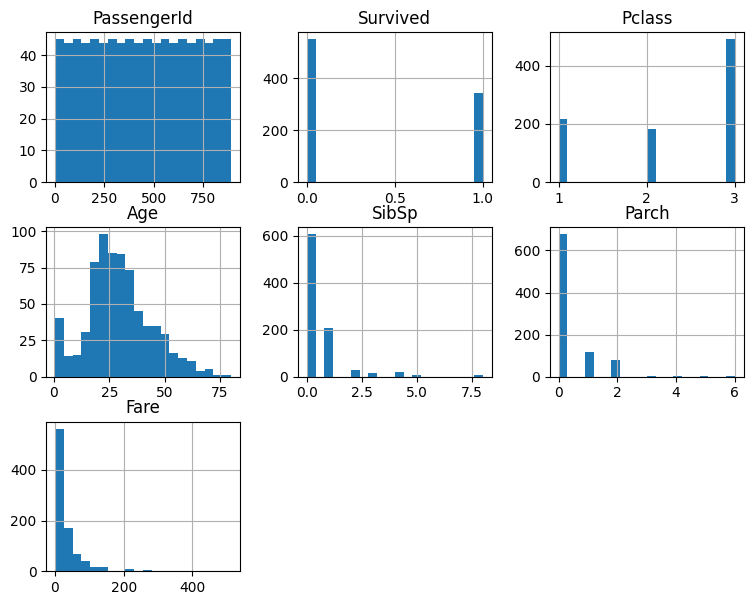

In [12]:
train_data.hist(bins=20,figsize=(9,7))
plt.show()

<Axes: >

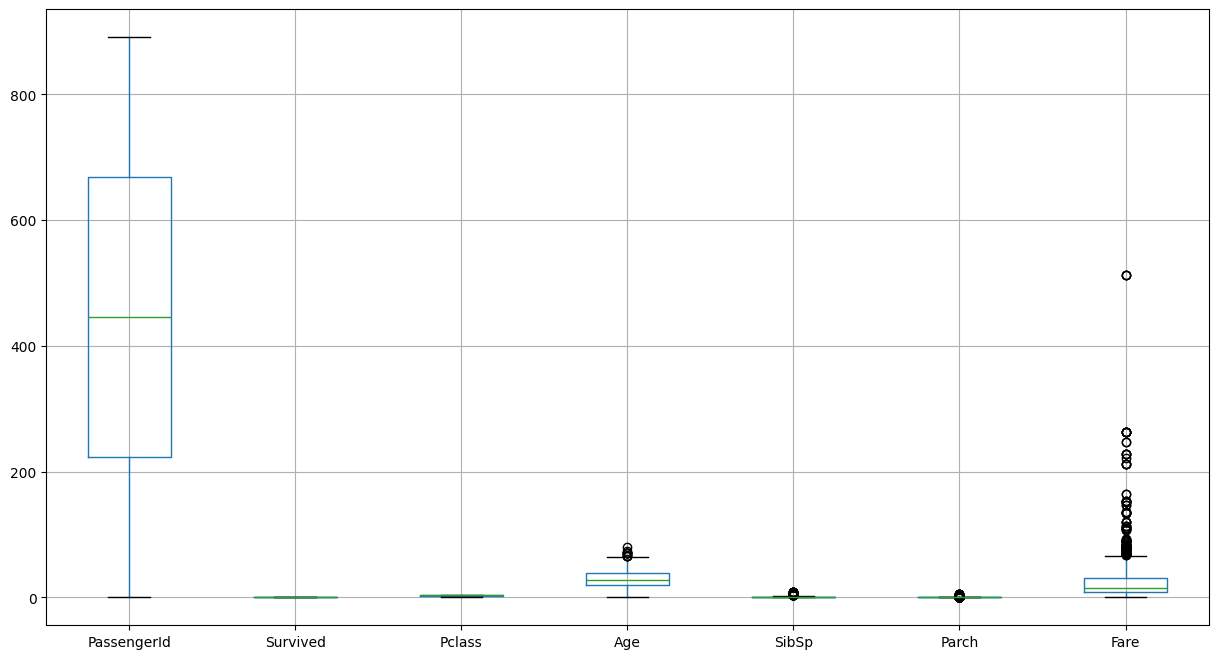

In [13]:
train_data.boxplot(figsize=(15,8))

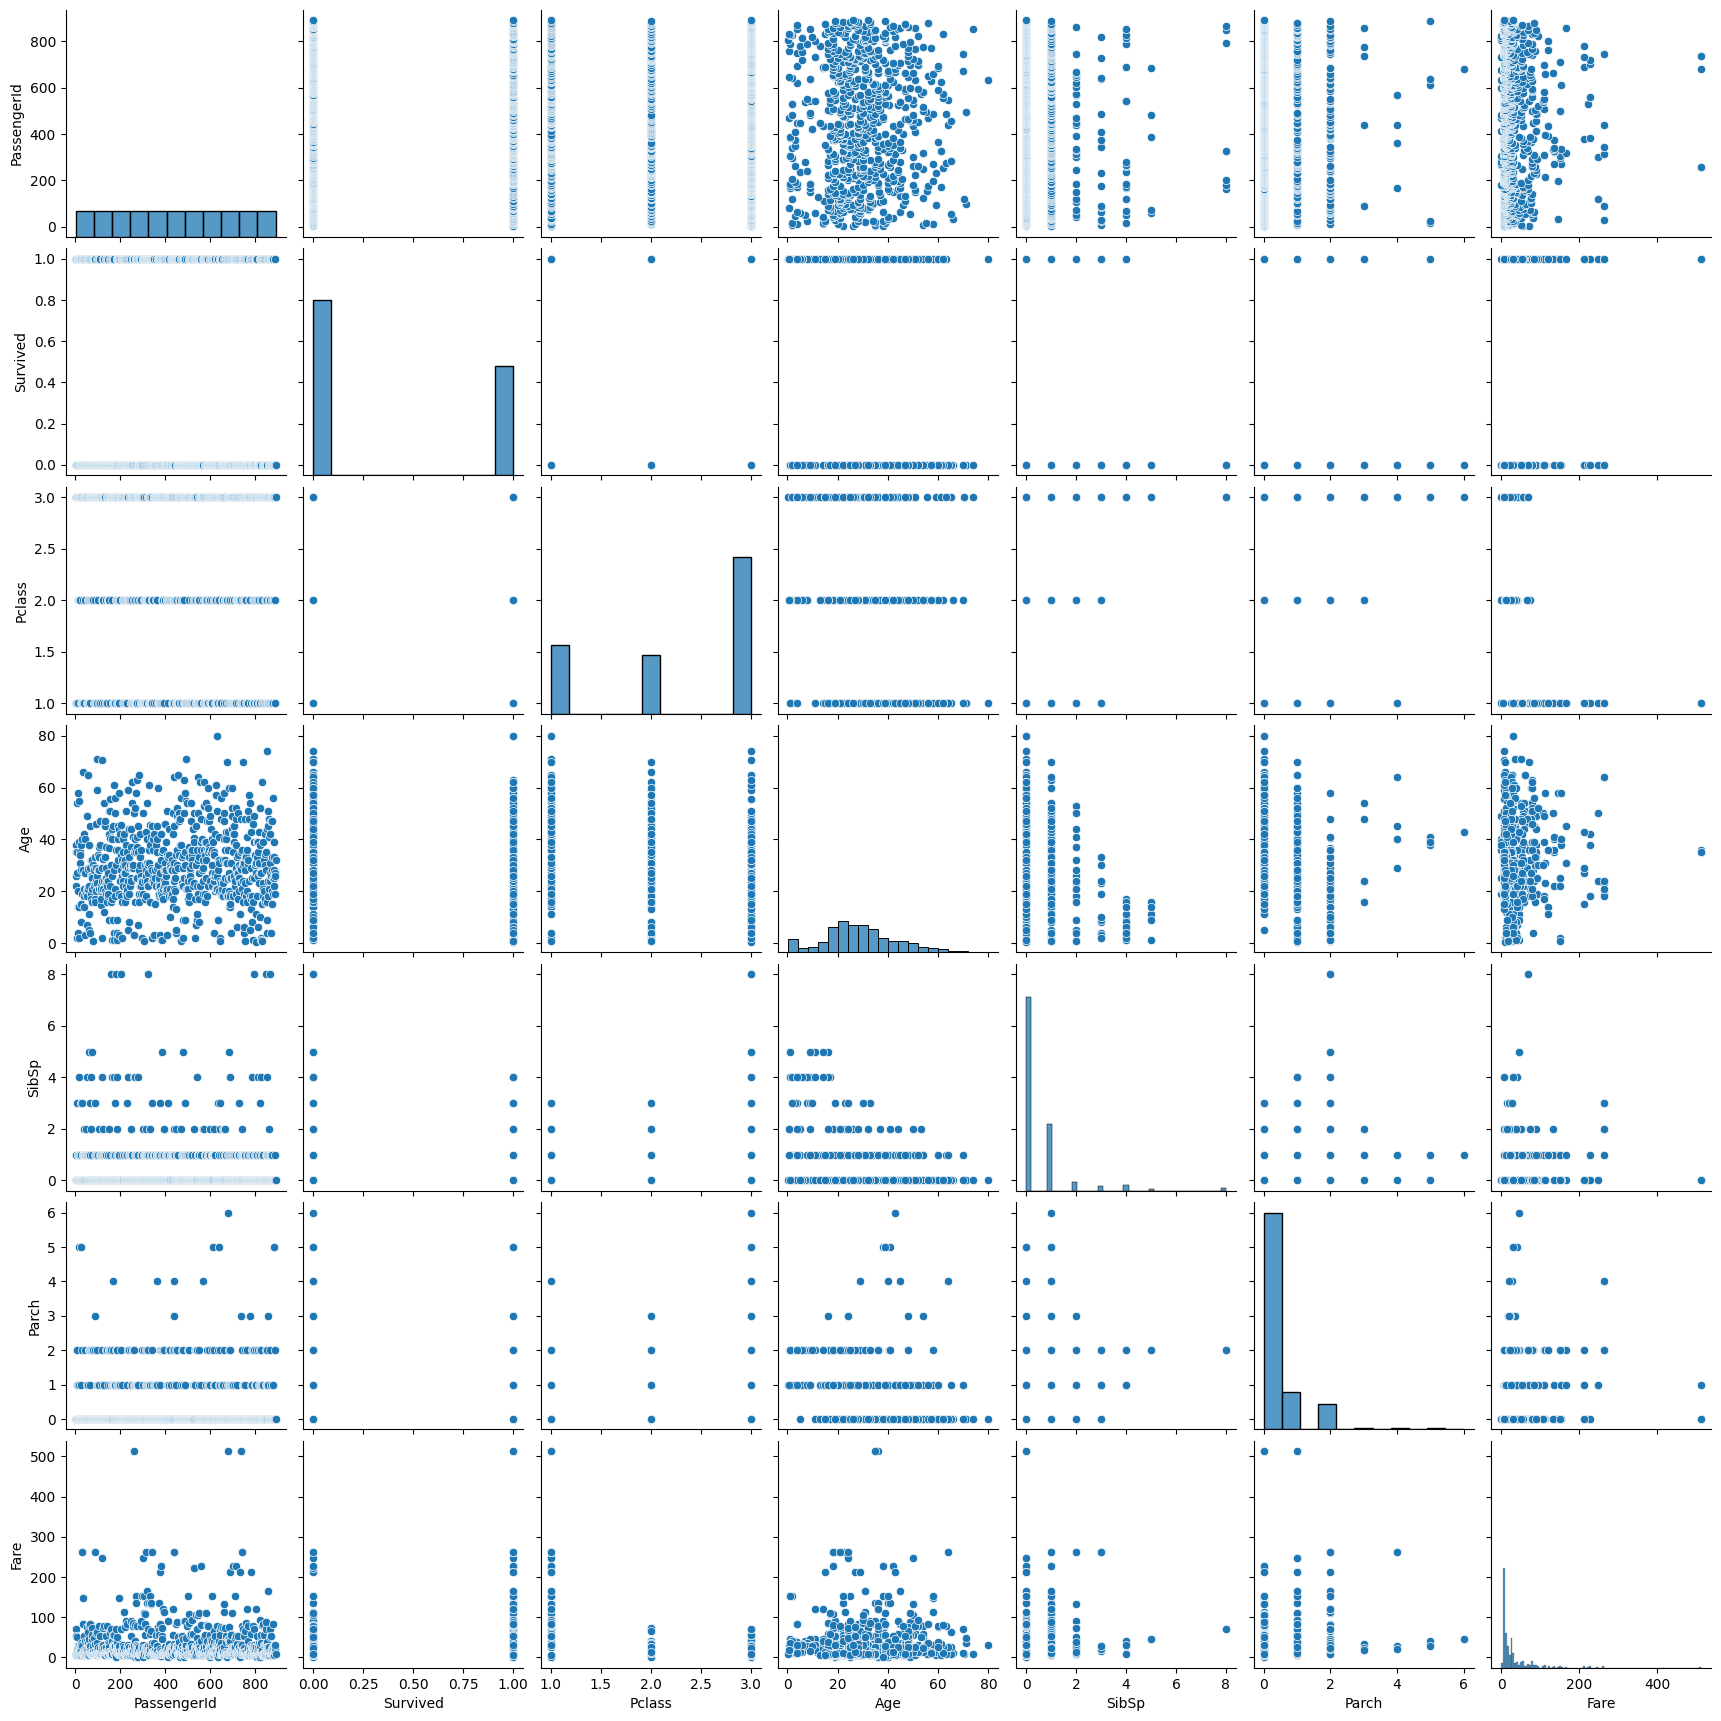

In [14]:
sns.pairplot(train_data)

Text(0.5, 1.0, 'how many men and women in traindata')

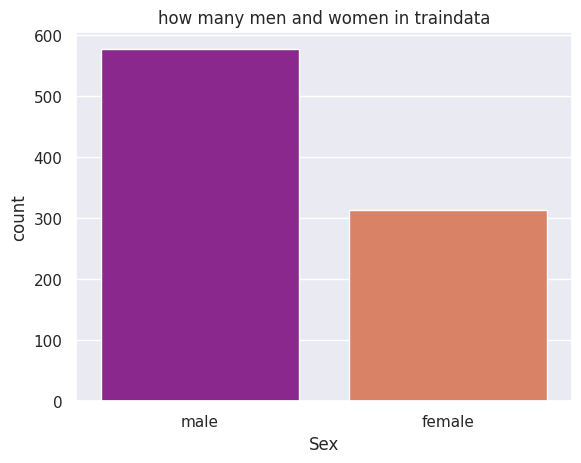

In [15]:
sns.set(font_scale=1)
sns.countplot(x='Sex',data=train_data,palette='plasma').set_title('how many men and women in traindata')

**2. Data Preprocessing:**

In [16]:
train_data.drop('Cabin',inplace=True,axis=1)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [17]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
#treaing null values
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode().iloc[0],inplace=True)
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
train_data.drop(columns=['Name','Ticket'],inplace=True)
train_data=pd.get_dummies(train_data,columns=['Sex','Embarked'],dtype=int)
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [21]:
test_data=pd.read_csv('https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/Titanic_test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
test_data.drop('Cabin',inplace=True,axis=1)
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [23]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode().iloc[0],inplace=True)
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_female,0
Sex_male,0
Embarked_C,0


In [24]:
test_data.drop(columns=['Name','Ticket'],inplace=True)
test_data=pd.get_dummies(test_data,columns=['Sex','Embarked'],dtype=int)
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0,1,0,1,0
1,893,3,47.00000,1,0,7.0000,1,0,0,0,1
2,894,2,62.00000,0,0,9.6875,0,1,0,1,0
3,895,3,27.00000,0,0,8.6625,0,1,0,0,1
4,896,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,1,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,0,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,0,1,0,0,1


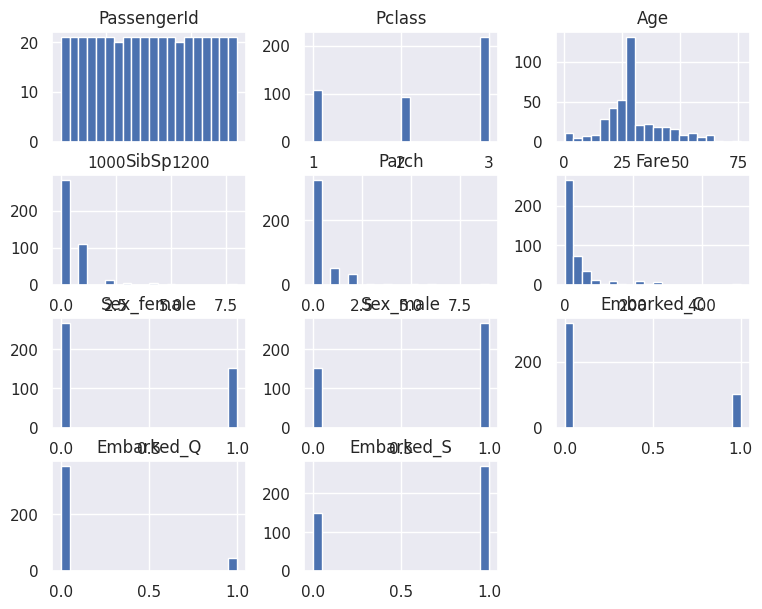

In [25]:
test_data.hist(bins=20,figsize=(9,7))
plt.show()

In [26]:
features_train = train_data.drop('Survived',axis=1)
features_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0


In [27]:
target_train= train_data[['Survived']]
target_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(features_train,target_train,train_size=0.8,random_state=11)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred=logreg.predict(x_test)
y_pred


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1])

**4. Model Evaluation:**

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
confusion_matrix(y_test,y_pred)

array([[107,  11],
       [ 14,  47]])

In [31]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.91      0.90       118\n           1       0.81      0.77      0.79        61\n\n    accuracy                           0.86       179\n   macro avg       0.85      0.84      0.84       179\nweighted avg       0.86      0.86      0.86       179\n'

In [32]:
print('ACCURACY:',accuracy_score(y_test,y_pred)*100)

ACCURACY: 86.03351955307262


In [33]:
roc_auc = roc_auc_score(y_test,y_pred)
print(roc_auc)

0.8386357321478188


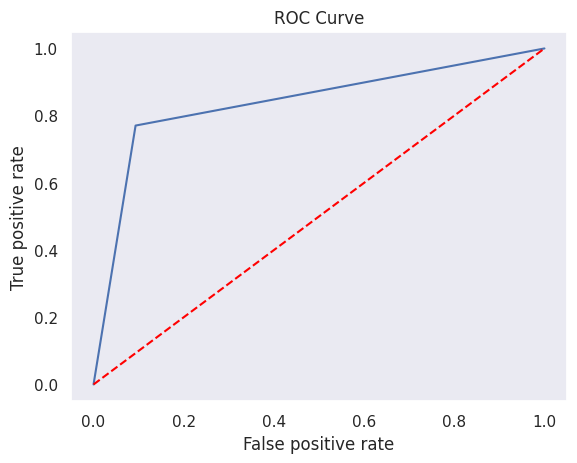

In [34]:
fpr,tpr,thr=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='logit model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.grid(False)
plt.show()

**5. Interpretation:**

In [35]:
print("Intercept",logreg.intercept_)
print("slope",logreg.coef_)

Intercept [1.63732933]
slope [[ 3.72328208e-05 -9.07120705e-01 -3.31565925e-02 -2.25859043e-01
  -7.40953630e-02  1.79440822e-03  2.03081834e+00 -4.70426720e-01
   8.36287112e-01  2.10238613e-01  5.13865892e-01]]


In [36]:
import pickle
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(logreg, f)

In [37]:

import pickle
import numpy as np

In [40]:

import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression  # Include this to help pickle resolve class

# Load model
with open("logistic_model.pkl", "rb") as f:
    model = pickle.load(f)


**Interview Questions:**

In [ ]:
#1. What is the difference between precision and recall?
#    Precision: Measures the accuracy of positive predictions. High precision means few false positives.
#    Recall: Measures how well the model identifies all actual positives. High recall means few false negatives.

#2. What is cross-validation, and why is it important in binary classification?
#    A technique to evaluate model performance by splitting data into multiple subsets (folds) and testing the model across these folds.
#    Important for reducing overfitting and ensuring the model generalizes well to new data.